## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


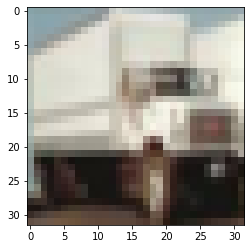

In [5]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [9]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

We still have 181K parameters, even though this is a "small" model.


In [35]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 18s 367us/step - loss: 1.7363 - accuracy: 0.3672 - val_loss: 1.6114 - val_accuracy: 0.4322
Epoch 2/15
50000/50000 [==============================] - 19s 371us/step - loss: 1.4584 - accuracy: 0.4736 - val_loss: 1.3857 - val_accuracy: 0.5032
Epoch 3/15
50000/50000 [==============================] - 19s 387us/step - loss: 1.3536 - accuracy: 0.5133 - val_loss: 1.3423 - val_accuracy: 0.5200
Epoch 4/15
50000/50000 [==============================] - 23s 459us/step - loss: 1.2841 - accuracy: 0.5425 - val_loss: 1.7646 - val_accuracy: 0.4171
Epoch 5/15
50000/50000 [==============================] - 22s 436us/step - loss: 1.2388 - accuracy: 0.5594 - val_loss: 1.1203 - val_accuracy: 0.6067
Epoch 6/15
50000/50000 [==============================] - 20s 409us/step - loss: 1.2020 - accuracy: 0.5739 - val_loss: 1.0997 - val_accuracy: 0.6157
Epoch 7/15
50000/50000 [==============================] 

In [36]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0490906898498535
Test accuracy: 0.6410999894142151


### -----------------------------------------------------------------------------------------------------------------------------

### MORE ACCURATE, MORE COMPUTATIONALLY-INTENSIVE MODEL

In [22]:
# Let's build a CNN using Keras' Sequential capabilities

model_alt = Sequential()


## 1st CNN Layer
model_alt.add(Conv2D(32, (3, 3), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_alt.add(Activation('relu'))
model_alt.add(Conv2D(32, (3, 3), strides = (1,1)))
model_alt.add(Activation('relu'))
model_alt.add(MaxPooling2D(pool_size=(1, 1)))
model_alt.add(Dropout(0.2))
#-------------------------------------------------------------------
## 2nd CNN Layer
model_alt.add(Conv2D(64, (3, 3), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_alt.add(Activation('relu'))
model_alt.add(Conv2D(64, (3, 3), strides = (1,1)))
model_alt.add(Activation('relu'))
model_alt.add(MaxPooling2D(pool_size=(1, 1)))
model_alt.add(Dropout(0.3))
#-------------------------------------------------------------------
## Flatten turns 3x3x32 into 288x1
model_alt.add(Flatten())

model_alt.add(Dense(512))
model_alt.add(Activation('relu'))
model_alt.add(Dropout(0.5))

model_alt.add(Dense(512))
model_alt.add(Activation('relu'))
model_alt.add(Dropout(0.5))

model_alt.add(Dense(num_classes))
model_alt.add(Activation('softmax'))

In [23]:
model_alt.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 64)       

In [24]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_alt.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_alt.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 9152/50000 [====>.........................] - ETA: 10:13 - loss: 1.9786 - accuracy: 0.2709

KeyboardInterrupt: 

In [ ]:
score = model_alt.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### MY OWN MODEL
> Test loss: 0.6803208335876465

> Test accuracy: 0.8220999836921692

# Attached are Pictures To Prove It. If you want faster compilation, shorten the # of epochs, although it will not model accuracy well. Total compilation time for 20 epochs ~80 minutes

In [14]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(x_train)

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [15]:
# build a CNN using Keras' Sequential capabilities

num_classes = 10
weight_decay = 1e-4

model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))
 
model_2.add(Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.3))
 
model_2.add(Conv2D(128, (3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(128, (3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
 
model_2.add(Flatten())
model_2.add(Dense(num_classes, activation='softmax'))

In [16]:
# Check number of parameters
model_2.summary()

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)       

In [17]:
batch_size = 64

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(datagen.flow(x_train, y_train,
              batch_size=batch_size),
              epochs=20,
              validation_data=(x_test, y_test),
            callbacks=[LearningRateScheduler(lr_schedule)]
              #shuffle=True
           )

Epoch 1/20
782/782 [==============================] - 289s 370ms/step - loss: 1.9305 - accuracy: 0.4158 - val_loss: 1.6042 - val_accuracy: 0.5232
Epoch 2/20
782/782 [==============================] - 295s 378ms/step - loss: 1.3079 - accuracy: 0.5791 - val_loss: 1.2620 - val_accuracy: 0.6147
Epoch 3/20
782/782 [==============================] - 298s 381ms/step - loss: 1.0970 - accuracy: 0.6478 - val_loss: 0.9723 - val_accuracy: 0.6956
Epoch 4/20
782/782 [==============================] - 298s 381ms/step - loss: 0.9883 - accuracy: 0.6886 - val_loss: 0.9419 - val_accuracy: 0.7175
Epoch 5/20
782/782 [==============================] - 293s 375ms/step - loss: 0.9252 - accuracy: 0.7121 - val_loss: 1.0836 - val_accuracy: 0.6914
Epoch 6/20
782/782 [==============================] - 301s 385ms/step - loss: 0.8747 - accuracy: 0.7318 - val_loss: 0.8490 - val_accuracy: 0.7558
Epoch 7/20
782/782 [==============================] - 309s 396ms/step - loss: 0.8409 - accuracy: 0.7452 - val_loss: 1.0766 -

In [18]:
"""#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model_2.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model_2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=100,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
        
"""

"#training\nbatch_size = 64\n \nopt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)\nmodel_2.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])\nmodel_2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=100,                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])\n        \n"

In [19]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6803208335876465
Test accuracy: 0.8220999836921692


In [ ]:
# initiate RMSprop optimizer

# train the model using RMSprop


In [ ]:
# Fit the model here
